In [34]:
import pandas as pd
import japanize_matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [7]:
df = pd.read_excel(r"C:\Users\sk062\Downloads\merge_df.xlsx")

In [8]:
df.head()

,地域,2023年度 待機児童,A1101_総人口【人】,A1201_0～4歳人口【人】,保育所等数（基本票）,保育所数÷子供の人数,総教員数,園長,副園長,教頭,主幹教諭,指導教諭,教諭,助教諭,養護教諭,養護助教諭,栄養教諭,講師,教育補助員
0,北海道,62,5092000,142000,1099,0.006072,704,17,5,1,4,0,460,101,5,0,8,103,265
1,青森県,0,1184000,32000,472,0.014750,73,10,0,0,0,0,44,3,1,0,2,13,48
2,岩手県,27,1163000,32000,391,0.012219,131,12,1,0,0,0,92,2,3,0,0,21,71
3,宮城県,41,2264000,69000,515,0.007464,476,28,3,0,3,2,359,5,15,0,0,61,146
4,秋田県,3,914000,22000,268,0.012182,48,5,1,0,1,0,27,0,0,0,0,14,28


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   地域               47 non-null     object 
 1   2023年度 待機児童      47 non-null     int64  
 2   A1101_総人口【人】     47 non-null     int64  
 3   A1201_0～4歳人口【人】  47 non-null     int64  
 4   保育所等数（基本票）       47 non-null     int64  
 5   保育所数÷子供の人数       47 non-null     float64
 6   総教員数             47 non-null     int64  
 7   園長               47 non-null     int64  
 8   副園長              47 non-null     int64  
 9   教頭               47 non-null     int64  
 10  主幹教諭             47 non-null     int64  
 11  指導教諭             47 non-null     int64  
 12  教諭               47 non-null     int64  
 13  助教諭              47 non-null     int64  
 14  養護教諭             47 non-null     int64  
 15  養護助教諭            47 non-null     int64  
 16  栄養教諭             47 non-null     int64  
 17  講師               4

In [10]:
df.describe()

,2023年度 待機児童,A1101_総人口【人】,A1201_0～4歳人口【人】,保育所等数（基本票）,保育所数÷子供の人数,総教員数,園長,副園長,教頭,主幹教諭,指導教諭,教諭,助教諭,養護教諭,養護助教諭,栄養教諭,講師,教育補助員
count,47.000000,4.700000e+01,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,57.021277,2.645809e+06,87063.829787,645.914894,0.012531,514.595745,23.425532,5.085106,1.553191,1.340426,1.276596,330.106383,21.893617,5.659574,0.978723,1.765957,121.510638,231.936170
std,97.292810,2.797551e+06,93444.799854,616.423585,0.023506,597.879247,26.846378,7.912098,3.229002,2.379958,2.516918,446.298362,39.633228,6.301403,2.048216,2.342544,145.473271,406.689947
min,0.000000,5.370000e+05,19000.000000,187.000000,0.000462,41.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000
25%,0.000000,1.034000e+06,31500.000000,299.000000,0.006481,121.500000,6.000000,0.500000,0.000000,0.000000,0.000000,61.000000,0.500000,1.000000,0.000000,0.000000,21.000000,52.500000
50%,10.000000,1.549000e+06,56000.000000,439.000000,0.007607,274.000000,15.000000,2.000000,0.000000,0.000000,0.000000,122.000000,5.000000,3.000000,0.000000,1.000000,61.000000,108.000000
75%,58.500000,2.636500e+06,83000.000000,662.000000,0.011180,590.500000,31.000000,5.000000,2.000000,1.500000,2.000000,374.000000,27.000000,8.000000,1.000000,3.000000,173.000000,192.000000
max,411.000000,1.408600e+07,461000.000000,3615.000000,0.164318,2506.000000,142.000000,38.000000,18.000000,11.000000,14.000000,1725.000000,178.000000,24.000000,11.000000,9.000000,750.000000,2029.000000


In [14]:
# 分析に使う主要な列を選びます
selected_columns = ['2023年度 待機児童', 'A1201_0～4歳人口【人】', '保育所等数（基本票）', '総教員数']
select_df = df[selected_columns]
select_df.head()

,2023年度 待機児童,A1201_0～4歳人口【人】,保育所等数（基本票）,総教員数
0,62,142000,1099,704
1,0,32000,472,73
2,27,32000,391,131
3,41,69000,515,476
4,3,22000,268,48


In [15]:
# 相関係数
corr_select= select_df.corr()
corr_select

,2023年度 待機児童,A1201_0～4歳人口【人】,保育所等数（基本票）,総教員数
2023年度 待機児童,1.000000,0.633709,0.622615,0.630018
A1201_0～4歳人口【人】,0.633709,1.000000,0.974560,0.961553
保育所等数（基本票）,0.622615,0.974560,1.000000,0.914229
総教員数,0.630018,0.961553,0.914229,1.000000


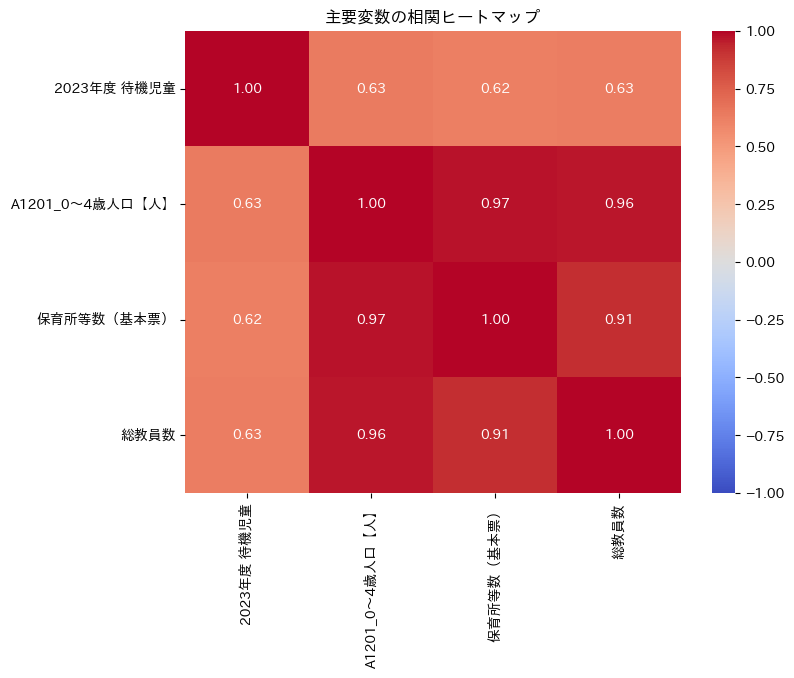

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_select, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('主要変数の相関ヒートマップ')
plt.show()

In [21]:
# 指標づくり
df_ratios = df.copy()
df_ratios['施設あたりの子供数'] = df_ratios['A1201_0～4歳人口【人】'] / df_ratios['保育所等数（基本票）']
df_ratios['教員一人あたりの子供数'] = df_ratios['A1201_0～4歳人口【人】'] / df_ratios['総教員数']
df_ratios['施設あたりの教員数'] = df_ratios['総教員数'] / df_ratios['保育所等数（基本票）']

In [23]:
df_ratios2 = df_ratios[['地域', '2023年度 待機児童', '施設あたりの子供数', '教員一人あたりの子供数', '施設あたりの教員数']]
df_ratios2.head()

,地域,2023年度 待機児童,施設あたりの子供数,教員一人あたりの子供数,施設あたりの教員数
0,北海道,62,129.208371,201.704545,0.640582
1,青森県,0,67.796610,438.356164,0.154661
2,岩手県,27,81.841432,244.274809,0.335038
3,宮城県,41,133.980583,144.957983,0.924272
4,秋田県,3,82.089552,458.333333,0.179104


In [24]:
df_ratios2.describe()

,2023年度 待機児童,施設あたりの子供数,教員一人あたりの子供数,施設あたりの教員数
count,47.000000,47.000000,47.000000,47.000000
mean,57.021277,124.059908,235.265577,0.717966
std,97.292810,30.187564,145.681539,0.438471
min,0.000000,67.796610,74.074074,0.102241
25%,0.000000,100.230672,145.956926,0.368948
50%,10.000000,127.524205,200.000000,0.640582
75%,58.500000,145.846215,260.184120,0.989606
max,411.000000,185.579937,863.013699,1.856502


In [27]:
new_corr_columns = ['2023年度 待機児童', '施設あたりの子供数', '教員一人あたりの子供数', '施設あたりの教員数']
new_correlation = df_ratios[new_corr_columns].corr()
new_correlation

,2023年度 待機児童,施設あたりの子供数,教員一人あたりの子供数,施設あたりの教員数
2023年度 待機児童,1.000000,0.389105,-0.175890,0.258846
施設あたりの子供数,0.389105,1.000000,-0.508153,0.762797
教員一人あたりの子供数,-0.175890,-0.508153,1.000000,-0.717439
施設あたりの教員数,0.258846,0.762797,-0.717439,1.000000


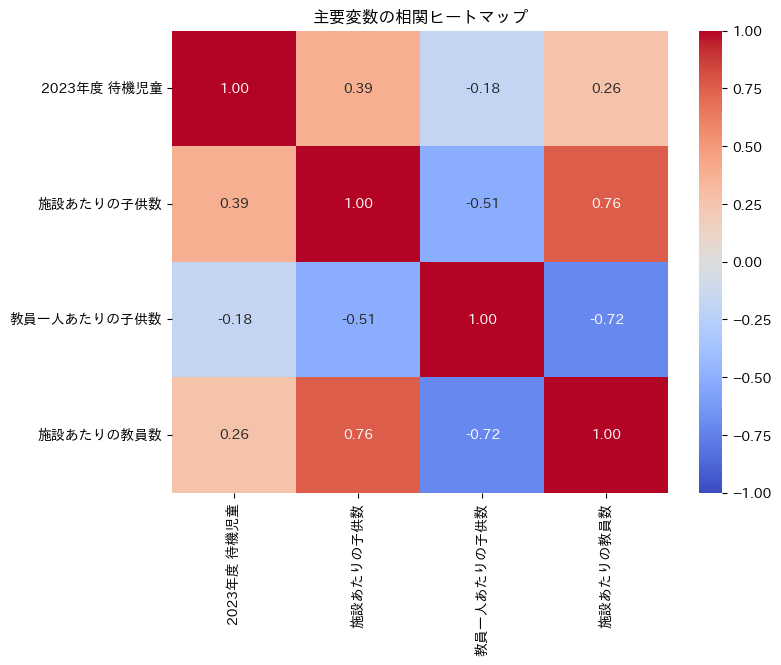

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(new_correlation, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('主要変数の相関ヒートマップ')
plt.show()

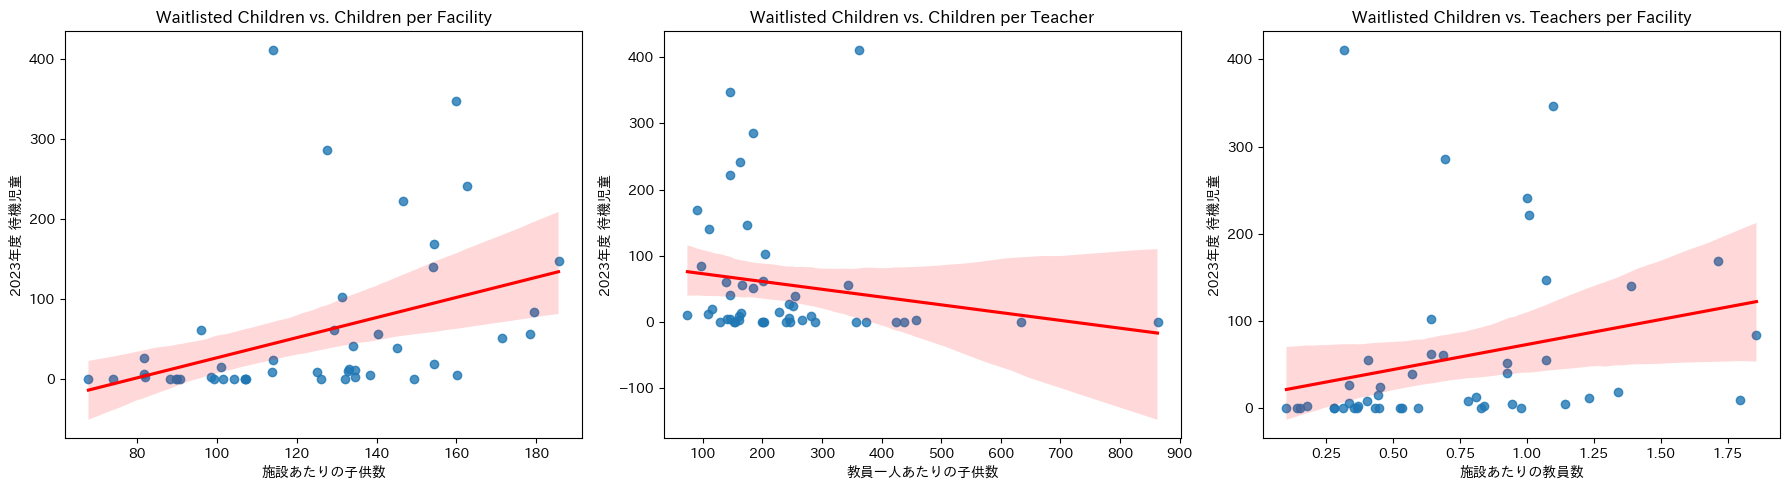

In [29]:
# 散布図の作成
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 散布図1: 待機児童数 vs 施設あたりの子供数
sns.regplot(ax=axes[0], x='施設あたりの子供数', y='2023年度 待機児童', data=df_ratios, line_kws={"color":"red"})
axes[0].set_title('Waitlisted Children vs. Children per Facility')

# 散布図2: 待機児童数 vs 教員一人あたりの子供数
sns.regplot(ax=axes[1], x='教員一人あたりの子供数', y='2023年度 待機児童', data=df_ratios, line_kws={"color":"red"})
axes[1].set_title('Waitlisted Children vs. Children per Teacher')

# 散布図3: 待機児童数 vs 施設あたりの教員数
sns.regplot(ax=axes[2], x='施設あたりの教員数', y='2023年度 待機児童', data=df_ratios, line_kws={"color":"red"})
axes[2].set_title('Waitlisted Children vs. Teachers per Facility')

plt.tight_layout()
plt.show()

In [35]:
X = df_ratios["施設あたりの子供数"]
y = df_ratios["2023年度 待機児童"]

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            2023年度 待機児童   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     8.029
Date:                Sat, 23 Aug 2025   Prob (F-statistic):            0.00687
Time:                        01:04:20   Log-Likelihood:                -277.48
No. Observations:                  47   AIC:                             559.0
Df Residuals:                      45   BIC:                             562.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -98.5578     56.476     -1.745      0.088    -212.306      15.190
施設あたりの子供数      1.2541      0.443      2.833      0.007       0.363       2.145
==============================================================================
Omnibus:                       39.001   Durbin-Watson:                   1.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.748
Skew:                           2.319   Prob(JB):                     1.09e-23
Kurtosis:                       8.700   Cond. No.                         545.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
X2 = df_ratios[['施設あたりの子供数', '教員一人あたりの子供数', '施設あたりの教員数']]
y2 = df_ratios["2023年度 待機児童"]

X2 = sm.add_constant(X2)

# --- 重回帰分析の実行 ---

# 最小二乗法（OLS）を用いてモデルを構築します
model2 = sm.OLS(y2, X2)
results2 = model.fit()

results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            2023年度 待機児童   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     8.029
Date:                Sat, 23 Aug 2025   Prob (F-statistic):            0.00687
Time:                        01:11:03   Log-Likelihood:                -277.48
No. Observations:                  47   AIC:                             559.0
Df Residuals:                      45   BIC:                             562.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -98.5578     56.476     -1.745      0.088    -212.306      15.190
施設あたりの子供数      1.2541      0.443      2.833      0.007       0.363       2.145
==============================================================================
Omnibus:                       39.001   Durbin-Watson:                   1.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.748
Skew:                           2.319   Prob(JB):                     1.09e-23
Kurtosis:                       8.700   Cond. No.                         545.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""